<a href="https://colab.research.google.com/github/African-language-Speech-Recognition/african_language-Speech_Recognition/blob/dan_preprocessing/notebooks/data__visualization_Danayt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/getalp/ALFFA_PUBLIC.git

Cloning into 'ALFFA_PUBLIC'...
remote: Enumerating objects: 66044, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 66044 (delta 8), reused 1 (delta 0), pack-reused 66024
Receiving objects: 100% (66044/66044), 6.54 GiB | 31.65 MiB/s, done.
Resolving deltas: 100% (12345/12345), done.
Checking out files: 100% (56926/56926), done.


In [ ]:
!du -sh ALFFA_PUBLIC/

16G	ALFFA_PUBLIC/


In [ ]:
!du -sh ALFFA_PUBLIC/ASR/*

2.5G	ALFFA_PUBLIC/ASR/AMHARIC
824M	ALFFA_PUBLIC/ASR/FONGBE
11M	ALFFA_PUBLIC/ASR/HAUSA
124K	ALFFA_PUBLIC/ASR/LREC2016_DataCollection_And_ALFFA_Project.pdf
1.5G	ALFFA_PUBLIC/ASR/SWAHILI
2.7G	ALFFA_PUBLIC/ASR/WOLOF


In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp -r ALFFA_PUBLIC/ASR/SWAHILI drive/MyDrive/Week-4-STT/data

In [ ]:
!du -sh drive/MyDrive/Week-4-STT/data/*

2.4G	drive/MyDrive/Week-4-STT/data/AMHARIC
1.4G	drive/MyDrive/Week-4-STT/data/SWAHILI


In [29]:
ls

spk2utt  text  trsTrain.txt  utt2spk  wav/  wav.scp


In [ ]:
os.listdir()

['spk2utt', 'text', 'trsTrain.txt', 'utt2spk', 'wav.scp', 'wav']

In [ ]:
import pandas as pd
import librosa   #for audio processing
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile #for audio processing
import warnings
warnings.filterwarnings("ignore")

In [33]:
cd ..

/content/drive/My Drive/Week-4-STT/data/AMHARIC/data/train


In [ ]:
train_audio_path = 'wav/'
samples, sample_rate = librosa.load(train_audio_path+'tr_2_tr01002.wav')
print(samples)
print(sample_rate)

[-0.00490301 -0.00560372 -0.00511889 ... -0.00575173 -0.00444451
  0.        ]
22050


In [ ]:
audio, rate=librosa.load(train_audio_path+'tr_2_tr01002.wav', sr=44100)

In [ ]:
ipd.Audio(samples, rate=sample_rate)

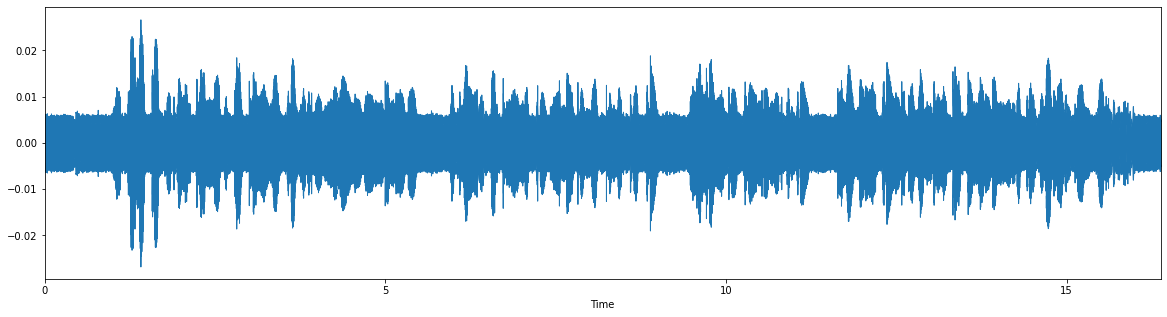

In [ ]:
%matplotlib inline
import librosa.display
#Plot the signal:
plt.figure(figsize=(20, 5))
librosa.display.waveplot(samples, sr=sample_rate)

In [ ]:
from numpy.lib.stride_tricks import as_strided
def spectrogram(samples, fft_length=256, sample_rate=2, hop_length=128):
    """
    Compute the spectrogram for a real signal.
    The parameters follow the naming convention of
    matplotlib.mlab.specgram

    Args:
        samples (1D array): input audio signal
        fft_length (int): number of elements in fft window
        sample_rate (scalar): sample rate
        hop_length (int): hop length (relative offset between neighboring
            fft windows).

    Returns:
        x (2D array): spectrogram [frequency x time]
        freq (1D array): frequency of each row in x

    Note:
        This is a truncating computation e.g. if fft_length=10,
        hop_length=5 and the signal has 23 elements, then the
        last 3 elements will be truncated.
    """
    assert not np.iscomplexobj(samples), "Must not pass in complex numbers"

    window = np.hanning(fft_length)[:, None]
    window_norm = np.sum(window**2)

    # The scaling below follows the convention of
    # matplotlib.mlab.specgram which is the same as
    # matlabs specgram.
    scale = window_norm * sample_rate

    trunc = (len(samples) - fft_length) % hop_length
    x = samples[:len(samples) - trunc]

    # "stride trick" reshape to include overlap
    nshape = (fft_length, (len(x) - fft_length) // hop_length + 1)
    nstrides = (x.strides[0], x.strides[0] * hop_length)
    x = as_strided(x, shape=nshape, strides=nstrides)

    # window stride sanity check
    assert np.all(x[:, 1] == samples[hop_length:(hop_length + fft_length)])

    # broadcast window, compute fft over columns and square mod
    x = np.fft.rfft(x * window, axis=0)
    x = np.absolute(x)**2

    # scale, 2.0 for everything except dc and fft_length/2
    x[1:-1, :] *= (2.0 / scale)
    x[(0, -1), :] /= scale

    freqs = float(sample_rate) / fft_length * np.arange(x.shape[0])

    return x, freqs

In [ ]:
spe_samples,frequency=spectrogram(samples)

In [ ]:
frequency

array([0.       , 0.0078125, 0.015625 , 0.0234375, 0.03125  , 0.0390625,
       0.046875 , 0.0546875, 0.0625   , 0.0703125, 0.078125 , 0.0859375,
       0.09375  , 0.1015625, 0.109375 , 0.1171875, 0.125    , 0.1328125,
       0.140625 , 0.1484375, 0.15625  , 0.1640625, 0.171875 , 0.1796875,
       0.1875   , 0.1953125, 0.203125 , 0.2109375, 0.21875  , 0.2265625,
       0.234375 , 0.2421875, 0.25     , 0.2578125, 0.265625 , 0.2734375,
       0.28125  , 0.2890625, 0.296875 , 0.3046875, 0.3125   , 0.3203125,
       0.328125 , 0.3359375, 0.34375  , 0.3515625, 0.359375 , 0.3671875,
       0.375    , 0.3828125, 0.390625 , 0.3984375, 0.40625  , 0.4140625,
       0.421875 , 0.4296875, 0.4375   , 0.4453125, 0.453125 , 0.4609375,
       0.46875  , 0.4765625, 0.484375 , 0.4921875, 0.5      , 0.5078125,
       0.515625 , 0.5234375, 0.53125  , 0.5390625, 0.546875 , 0.5546875,
       0.5625   , 0.5703125, 0.578125 , 0.5859375, 0.59375  , 0.6015625,
       0.609375 , 0.6171875, 0.625    , 0.6328125, 

In [ ]:
spe_samples

array([[1.63008265e-03, 2.53133197e-03, 2.60629994e-03, ...,
        1.94479421e-03, 2.92818373e-03, 2.70223772e-03],
       [7.07230126e-04, 1.39772326e-03, 1.31277987e-03, ...,
        9.74334415e-04, 1.52751738e-03, 1.45256034e-03],
       [4.07880856e-06, 3.79318579e-06, 5.40958301e-10, ...,
        5.85890359e-06, 1.16543346e-06, 1.45628015e-06],
       ...,
       [7.82185096e-17, 1.68082898e-17, 8.96696241e-18, ...,
        6.62109050e-18, 6.31278799e-18, 1.34650881e-18],
       [6.23789009e-17, 2.50253886e-17, 5.82329859e-20, ...,
        1.57799215e-18, 3.69826013e-19, 2.48476775e-18],
       [5.15934410e-17, 1.83891211e-18, 1.81378658e-18, ...,
        2.43778335e-18, 9.99652866e-19, 1.28693994e-18]])

In [ ]:
cd ..

/content/drive/MyDrive/Week-4-STT/data/AMHARIC/data


In [ ]:
cd train

/content/drive/MyDrive/Week-4-STT/data/AMHARIC/data/train


In [ ]:
ls

spk2utt  text  trsTrain.txt  utt2spk  wav/  wav.scp


In [ ]:
#function that load text file and change it to Dictionary 
def t_loader(filename):
  name_to_text = {}
  with open (filename, encoding="utf-8")as f:
    f.readline()
    for line in f:
          line = line.strip()
          alist = line.split('\t',1)
          key, values = alist[0], alist[1:]
          str1 = ''.join(str(e) for e in values)
          name_to_text[key] = str1
  #print(values)
  return name_to_text

In [ ]:
transcription=t_loader("/content/drive/My Drive/Week-4-STT/data/AMHARIC/data/train/text")

In [ ]:
transcription

{'tr_10001_tr097083 የ ጠመንጃ ተኩስ ተከፈተ ና አራት የኤርትራ ወታደሮች ተገደሉ': '',
 'tr_10002_tr097084 ላነሷቸው ጥያቄዎች የ ሰጡት ን መልስ አቅርበ ነዋል': '',
 'tr_10003_tr097085 እ ብዱ አስፋልቱ ላይ የ ኰለኰ ለ ው ድንጋይ መኪና አላ ሳልፍ አለ': '',
 'tr_10004_tr097086 ጠጁ ን ኰ መኰ መ ኰ መኰ መ ና ሚስቱ ን ሲ ያሰቃ ያት አደረ': '',
 'tr_10005_tr097087 ድንቹ በ ደንብ ስለተኰተኰተ በ ጥሩ ሁኔታ ኰረተ': '',
 'tr_10006_tr097088 በ ድህነቱ ላይ ይህ ክፉ በሽታ ስለ ያዘው ሰውነቱ በጣም ኰ ሰሰ': '',
 'tr_10007_tr097089 በሩን እንዲ ህ በ ሀይል አታንኳኲ ብዬ አልነበረ ም እንዴ': '',
 'tr_10008_tr097090 በለጠ ች የ በየነ የ በኩር ልጅ ነች': '',
 'tr_10009_tr097091 የ ቆላ ቁስል ና ቁርጥ ማት በጣም አሰቃቂ በሽታዎች ናቸው': '',
 'tr_1000_tr11001 ያ ኮምፒ ተር ለ ተጠቃሚው በ ትክክል የሚ ፈለገው ን ነገር እንዲ ያሟላ ማድረግ ነው': '',
 'tr_10010_tr097092 ባድመ ላይ ያለቀው የኤርትራ ወታደር ስፍር ቁጥር የ ለውም': '',
 'tr_10011_tr097093 እንዲያ መሬት አይ ን ካ ኝ ይል የነበረ ሰው በ ድንገት ቆረቆዘ አይደል': '',
 'tr_10012_tr097094 አንበሳው ስጋ ስላ የ አጉረመረ መ': '',
 'tr_10013_tr097095 ሸክላ ሰሪዋ አ ለሚ ቱ በ ጉልቻ ስራ የታወቀች ነች': '',
 'tr_10014_tr097096 የተፈራ አተር ቀድሞ ስለ ተዘራ ተ ሎ ጐመራ': '',
 'tr_10015_tr097097 ባልቻ ጐበዝ ተማሪ ስለሆነ ተሸላሚ እንዲሆን የ ትምህርት ማህበረሰብ በ አን

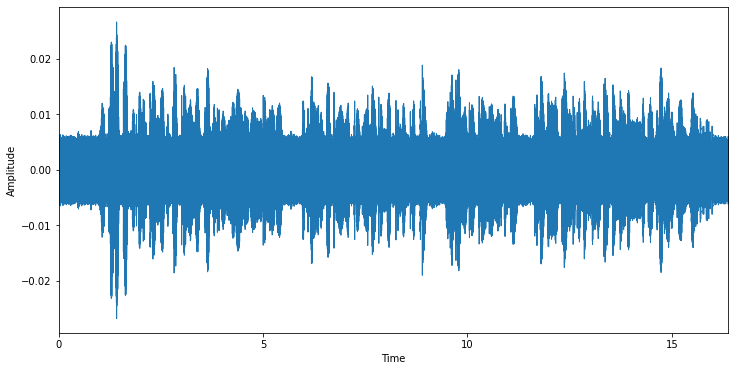

In [34]:
file="wav/tr_2_tr01002.wav"
plt.figure(figsize=(12,6))
data,sample_rate=librosa.load(file)
librosa.display.waveplot(data,sr=sample_rate)
plt.xlabel('Time')
plt.ylabel('Amplitude')
ipd.Audio(file)

In [35]:
file  =('wav/tr_1_tr01001.wav')
librosa_load, librosa_sampling_rate = librosa.load(file)
scipy_sampling_rate, scipy_load = wav.read(file)
print('original sample rate:',scipy_sampling_rate)
print('converted sample rate:',librosa_sampling_rate)
print('\n')
print('original wav file min~max range:',np.min(scipy_load),'~',np.max(scipy_load))
print('converted wav file min~max range:',np.min(librosa_load),'~',np.max(librosa_load))

original sample rate: 16000
converted sample rate: 22050


original wav file min~max range: -1016 ~ 347
converted wav file min~max range: -0.031806815 ~ 0.010806846


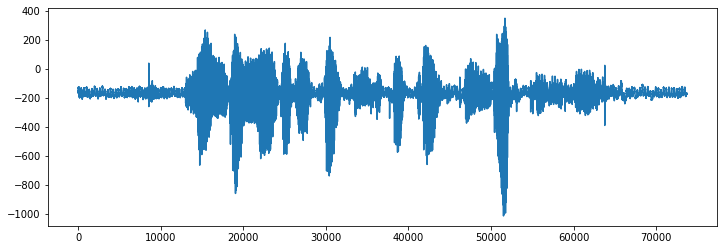

In [36]:
plt.figure(figsize=(12, 4))
plt.plot(scipy_load)

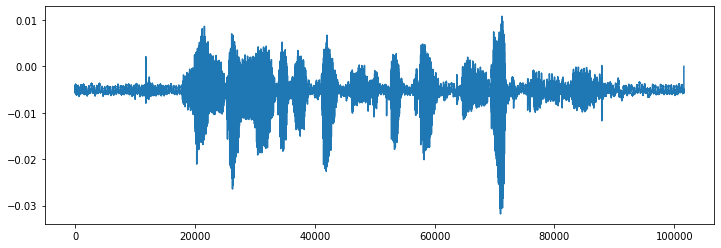

In [37]:
plt.figure(figsize=(12, 4))
plt.plot(librosa_load)